In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import openpyxl
import pickle
import xlsxwriter

In [2]:
aemet_vbl_description = json.load(open('metadata_aemet.json'))
aemet_vbl_description

{'unidad_generadora': 'Servicio del Banco Nacional de Datos Climatológicos',
 'periodicidad': '1 vez al día, con un retardo de 4 días',
 'descripcion': 'Climatologías diarias',
 'formato': 'application/json',
 'copyright': '© AEMET. Autorizado el uso de la información y su reproducción citando a AEMET como autora de la misma.',
 'notaLegal': 'https://www.aemet.es/es/nota_legal',
 'campos': [{'id': 'fecha',
   'descripcion': 'fecha del dia (AAAA-MM-DD)',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'indicativo',
   'descripcion': 'indicativo climatológico',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'nombre',
   'descripcion': 'nombre (ubicación) de la estación',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'provincia',
   'descripcion': 'provincia de la estación',
   'tipo_datos': 'string',
   'requerido': True},
  {'id': 'altitud',
   'descripcion': 'altitud de la estación en m sobre el nivel del mar',
   'tipo_datos': 'float',
   'unidad': 

In [3]:
df = pd.read_csv('ALL_DATA.csv', sep=';', decimal=",")
initial_variables = [i.lower() for i in df.columns] #useful later for checking metadata
#correct datatypes:
df['fecha'] = pd.to_datetime(df['fecha'])
print('# of total observations in each year:')
print([df.loc[(df['fecha'].dt.year==i), :].shape[0] for i in range(2010,2023+1)])
display(df.iloc[:,:(16+1)])
display(df.iloc[:,17:])

# of total observations in each year:
[365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 364, 304]


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,presMax,horaPresMax
0,2010-01-01,3195,"MADRID, RETIRO",MADRID,667,5.6,"0,1",3.6,Varias,7.6,12:30,26.0,4.4,16.1,13:20,938.5,24
1,2010-01-02,3195,"MADRID, RETIRO",MADRID,667,5.0,"0,0",2.6,03:40,7.5,15:10,27.0,1.1,5.8,01:00,942.8,Varias
2,2010-01-03,3195,"MADRID, RETIRO",MADRID,667,5.8,"6,7",4.2,02:30,7.4,13:20,16.0,0.8,5.3,15:20,941.6,03
3,2010-01-04,3195,"MADRID, RETIRO",MADRID,667,7.8,"9,5",6.4,Varias,9.2,17:10,4.0,1.7,6.7,06:20,936.4,00
4,2010-01-05,3195,"MADRID, RETIRO",MADRID,667,8.0,"0,0",6.2,23:59,9.8,14:50,31.0,0.6,5.3,21:30,926.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,2023-12-27,3195,"MADRID, RETIRO",MADRID,667,4.6,"0,0",-0.2,07:50,9.3,14:40,20.0,0.8,3.9,14:00,947.9,23
5047,2023-12-28,3195,"MADRID, RETIRO",MADRID,667,4.0,"0,0",0.9,04:00,7.1,14:50,9.0,0.6,3.9,06:50,948.9,11
5048,2023-12-29,3195,"MADRID, RETIRO",MADRID,667,6.1,"0,0",3.7,03:40,8.5,15:10,4.0,1.1,5.0,13:30,947.7,00
5049,2023-12-30,3195,"MADRID, RETIRO",MADRID,667,6.2,"0,0",1.8,05:50,10.7,15:20,23.0,0.8,5.3,20:20,944.8,11


,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,index,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,D,V
0,928.5,00,80.0,87.0,Varias,68.0,19:30,1095,28,79,35,8,28079035_8_8,24.0,V
1,938.5,00,84.0,95.0,Varias,74.0,00:00,1096,28,79,35,8,28079035_8_8,46.0,V
2,936.4,24,85.0,94.0,Varias,78.0,Varias,1097,28,79,35,8,28079035_8_8,59.0,V
3,924.2,24,96.0,98.0,Varias,92.0,23:59,1098,28,79,35,8,28079035_8_8,63.0,V
4,922.6,06,88.0,NaN,NaN,NaN,NaN,1099,28,79,35,8,28079035_8_8,54.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,945.1,14,76.0,99.0,Varias,55.0,14:30,29699,28,79,35,8,28079035_8_8,52.0,V
5047,946.7,14,78.0,95.0,00:40,67.0,15:40,29700,28,79,35,8,28079035_8_8,55.0,V
5048,943.5,15,79.0,89.0,Varias,54.0,15:00,29701,28,79,35,8,28079035_8_8,54.0,V
5049,940.9,16,79.0,97.0,08:30,61.0,12:40,29702,28,79,35,8,28079035_8_8,46.0,V


In [4]:
# handling 'prec' vbl encoding:

df['prec'] = df['prec'].str.replace(',','.')
print(df['prec'].value_counts().sort_index()) # since the value Ip has no clear meaning lets see if we have info in the metadata:
vbls_desc = aemet_vbl_description['campos']
[i for i in vbls_desc if i['id']=='prec'] #==: instead of putting Ip=NA its better to put Ip=0 or 0.001

###########################################
less_than_01mm = 0 #0.001

df['prec'] = df['prec'].str.replace('Ip',str(less_than_01mm)).astype(float)

df['prec'].value_counts().sort_index()

prec
0.0    3805
0.1      97
0.2      56
0.3      41
0.4      30
       ... 
9.6       4
9.7       1
9.8       6
9.9       2
Ip       39
Name: count, Length: 206, dtype: int64


prec
0.0     3844
0.1       97
0.2       56
0.3       41
0.4       30
        ... 
38.9       2
40.4       1
45.3       1
47.7       1
67.7       1
Name: count, Length: 205, dtype: int64

In [5]:
print('#values enconded with a negative validation code:')
print(sum(df['V'] == 'N')) # from 14 years of data, ayto of madrid has only 75 values coded as Non valid data
# (remember i'm not including two months of missing data from 2023 and fake dates as 31 of february from the originals .csv files)
# so we get rid of this values:
df = df.loc[df['V'] == 'V',:].drop(['V'], axis=1)
df

#values enconded with a negative validation code:
75


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,horaHrMax,hrMin,horaHrMin,index,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,D
0,2010-01-01,3195,"MADRID, RETIRO",MADRID,667,5.6,0.1,3.6,Varias,7.6,...,Varias,68.0,19:30,1095,28,79,35,8,28079035_8_8,24.0
1,2010-01-02,3195,"MADRID, RETIRO",MADRID,667,5.0,0.0,2.6,03:40,7.5,...,Varias,74.0,00:00,1096,28,79,35,8,28079035_8_8,46.0
2,2010-01-03,3195,"MADRID, RETIRO",MADRID,667,5.8,6.7,4.2,02:30,7.4,...,Varias,78.0,Varias,1097,28,79,35,8,28079035_8_8,59.0
3,2010-01-04,3195,"MADRID, RETIRO",MADRID,667,7.8,9.5,6.4,Varias,9.2,...,Varias,92.0,23:59,1098,28,79,35,8,28079035_8_8,63.0
4,2010-01-05,3195,"MADRID, RETIRO",MADRID,667,8.0,0.0,6.2,23:59,9.8,...,NaN,NaN,NaN,1099,28,79,35,8,28079035_8_8,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,2023-12-27,3195,"MADRID, RETIRO",MADRID,667,4.6,0.0,-0.2,07:50,9.3,...,Varias,55.0,14:30,29699,28,79,35,8,28079035_8_8,52.0
5047,2023-12-28,3195,"MADRID, RETIRO",MADRID,667,4.0,0.0,0.9,04:00,7.1,...,00:40,67.0,15:40,29700,28,79,35,8,28079035_8_8,55.0
5048,2023-12-29,3195,"MADRID, RETIRO",MADRID,667,6.1,0.0,3.7,03:40,8.5,...,Varias,54.0,15:00,29701,28,79,35,8,28079035_8_8,54.0
5049,2023-12-30,3195,"MADRID, RETIRO",MADRID,667,6.2,0.0,1.8,05:50,10.7,...,08:30,61.0,12:40,29702,28,79,35,8,28079035_8_8,46.0


In [6]:
# see a summary of each col ("number of categories")
for i in df.columns:
    print(df[i].value_counts().sort_index())
    print()

fecha
2010-01-01    1
2010-01-02    1
2010-01-03    1
2010-01-04    1
2010-01-05    1
             ..
2023-12-27    1
2023-12-28    1
2023-12-29    1
2023-12-30    1
2023-12-31    1
Name: count, Length: 4976, dtype: int64

indicativo
3195    4976
Name: count, dtype: int64

nombre
MADRID, RETIRO    4976
Name: count, dtype: int64

provincia
MADRID    4976
Name: count, dtype: int64

altitud
667    4976
Name: count, dtype: int64

tmed
-3.4     1
-1.8     2
-0.6     2
-0.4     2
-0.1     1
        ..
 32.4    3
 32.5    2
 32.6    1
 32.8    2
 33.4    2
Name: count, Length: 325, dtype: int64

prec
0.0     3788
0.1       97
0.2       54
0.3       41
0.4       29
        ... 
38.9       2
40.4       1
45.3       1
47.7       1
67.7       1
Name: count, Length: 205, dtype: int64

tmin
-7.4     1
-7.2     1
-5.3     1
-4.5     1
-4.4     1
        ..
 25.5    2
 25.6    1
 25.7    3
 26.1    1
 26.2    1
Name: count, Length: 298, dtype: int64

horatmin
00:00      32
00:10       9
00:15       5

In [7]:
varias_horas = ['horatmin',
'horatmax',
'horaracha',
'horaPresMax',
'horaPresMin',
'horaHrMax',
'horaHrMin']

In [8]:
df.columns.values

array(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed',
       'prec', 'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia',
       'racha', 'horaracha', 'presMax', 'horaPresMax', 'presMin',
       'horaPresMin', 'hrMedia', 'hrMax', 'horaHrMax', 'hrMin',
       'horaHrMin', 'index', 'PROVINCIA', 'MUNICIPIO', 'ESTACION',
       'MAGNITUD', 'PUNTO_MUESTREO', 'D'], dtype=object)

In [9]:
varias_df = df.loc[(df['horatmin'].values=='Varias')|(df['horatmax'].values=='Varias')|(df['horaracha'].values=='Varias')|(df['horaPresMax'].values=='Varias')|(df['horaPresMin'].values=='Varias')|
                   (df['horaHrMax'].values=='Varias')|(df['horaHrMin'].values=='Varias'),:]
print('# of observations with the label "Varias" in each year:')
print([varias_df.loc[(varias_df['fecha'].dt.year==i), :].shape[0] for i in range(2010,2023+1)]) 
print('# of total observations in each year:')
print([df.loc[(df['fecha'].dt.year==i), :].shape[0] for i in range(2010,2023+1)]) #the proportion is too high to drop so many rows:
# or drop this columns, or impute, but with so many futile data better to drop columns

# of observations with the label "Varias" in each year:
[234, 208, 225, 224, 213, 227, 223, 261, 249, 240, 219, 148, 151, 129]
# of total observations in each year:
[365, 365, 364, 364, 364, 357, 346, 365, 353, 358, 366, 365, 362, 282]


In [10]:
df = df.drop(varias_horas, axis = 1) # drop non useful variables in first instance
df.columns.values

array(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed',
       'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax',
       'presMin', 'hrMedia', 'hrMax', 'hrMin', 'index', 'PROVINCIA',
       'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'D'],
      dtype=object)

In [11]:
# print("NA in each row: #of NA | frecuancy of that number of NA's")
# print(df.isnull().sum(axis=1).value_counts())
# print('\nNA in each column:')
# print(df.isnull().sum(axis=0).to_string())

print('\nNA in each year:')
for i in range(2010,2023+1):
    print('\n Year: ',i,'     #NA')
    print(df.loc[df['fecha'].dt.year==i,:].isnull().sum(axis=0))
# something went wrong on 2020!! with dir, velmedia, racha (pandemic?)
# something REALLY went wrong in 2021 with dir, velmedia, racha!!!!!!!!
# in 2022 many NA's in dir, velmedia, racha, about 95 each
#
# we should categorize as potential problematic variables and maybe should not be included in the model:
many_nas = ['dir', 'velmedia', 'racha']


# from 2015 onwards:
# 2015: 25 na in hrMax and hrMin
# 2016-2017: impute without problem
# 2018: 21 na in many_nas
# 2019: impute without problem
#####   see above   #####


NA in each year:

 Year:  2010      #NA
fecha              0
indicativo         0
nombre             0
provincia          0
altitud            0
tmed               0
prec               0
tmin               0
tmax               0
dir                8
velmedia           3
racha              8
presMax            0
presMin            0
hrMedia            0
hrMax             64
hrMin             65
index              0
PROVINCIA          0
MUNICIPIO          0
ESTACION           0
MAGNITUD           0
PUNTO_MUESTREO     0
D                  0
dtype: int64

 Year:  2011      #NA
fecha              0
indicativo         0
nombre             0
provincia          0
altitud            0
tmed               0
prec               0
tmin               0
tmax               0
dir                8
velmedia           1
racha              8
presMax            1
presMin            0
hrMedia            0
hrMax             66
hrMin             66
index              0
PROVINCIA          0
MUNICIPIO          0

In [12]:
# print(df.loc[df['fecha'].dt.year==2021,:].to_string())

In [13]:
# df.info()
float_vbl = ['D']
string_vbl =['fecha', 'nombre', 'provincia', 'V']
print(df.dtypes.to_string())

fecha             datetime64[ns]
indicativo                 int64
nombre                    object
provincia                 object
altitud                    int64
tmed                     float64
prec                     float64
tmin                     float64
tmax                     float64
dir                       object
velmedia                 float64
racha                    float64
presMax                  float64
presMin                  float64
hrMedia                   object
hrMax                     object
hrMin                     object
index                      int64
PROVINCIA                  int64
MUNICIPIO                  int64
ESTACION                   int64
MAGNITUD                   int64
PUNTO_MUESTREO            object
D                         object


In [14]:
# Note!:
aemet_all_variables = [i['id'] for i in vbls_desc]
print('presMin' in df.columns)
print('presMin' in aemet_all_variables) # some variables do not have the same code in metadata (all lower case)
print('presMin'.lower() in aemet_all_variables)

True
False
True


In [15]:
# interesting meaning:
[i for i in vbls_desc if any([i['id']=='dir',i['id']=='racha'])]
# racha = vel maxima del viento?

[{'id': 'dir',
  'descripcion': 'Dirección de la racha máxima',
  'tipo_datos': 'float',
  'unidad': 'decenas de grado (99 = dirección variable)(88 = sin dato)',
  'requerido': False},
 {'id': 'racha',
  'descripcion': 'Racha máxima del viento',
  'tipo_datos': 'float',
  'unidad': 'm/s',
  'requerido': False}]

In [16]:
print(np.array(initial_variables))
print(df.columns)
print(varias_horas)

['fecha' 'indicativo' 'nombre' 'provincia' 'altitud' 'tmed' 'prec' 'tmin'
 'horatmin' 'tmax' 'horatmax' 'dir' 'velmedia' 'racha' 'horaracha'
 'presmax' 'horapresmax' 'presmin' 'horapresmin' 'hrmedia' 'hrmax'
 'horahrmax' 'hrmin' 'horahrmin' 'index' 'provincia' 'municipio'
 'estacion' 'magnitud' 'punto_muestreo' 'd' 'v']
Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax', 'presMin',
       'hrMedia', 'hrMax', 'hrMin', 'index', 'PROVINCIA', 'MUNICIPIO',
       'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'D'],
      dtype='object')
['horatmin', 'horatmax', 'horaracha', 'horaPresMax', 'horaPresMin', 'horaHrMax', 'horaHrMin']


In [17]:
useful_meta = [i for i in vbls_desc if i['id'] in initial_variables]
useful_meta[4:]
# dir = 99 or 88 == impute NA (maybe differently, 88 standard Knn, and 99 could be a mean of most frequent values or standard mean)

[{'id': 'altitud',
  'descripcion': 'altitud de la estación en m sobre el nivel del mar',
  'tipo_datos': 'float',
  'unidad': 'm',
  'requerido': True},
 {'id': 'tmed',
  'descripcion': 'Temperatura media diaria',
  'tipo_datos': 'float',
  'unidad': '°C',
  'requerido': False},
 {'id': 'prec',
  'descripcion': 'Precipitación diaria de 07 a 07',
  'tipo_datos': 'float',
  'unidad': 'mm (Ip = inferior a 0,1 mm) (Acum = Precipitación acumulada)',
  'requerido': False},
 {'id': 'tmin',
  'descripcion': 'Temperatura Mínima del día',
  'tipo_datos': 'float',
  'unidad': '°C',
  'requerido': False},
 {'id': 'horatmin',
  'descripcion': 'Hora y minuto de la temperatura mínima',
  'tipo_datos': 'string',
  'unidad': 'UTC',
  'requerido': False},
 {'id': 'tmax',
  'descripcion': 'Temperatura Máxima del día',
  'tipo_datos': 'float',
  'unidad': '°C',
  'requerido': False},
 {'id': 'horatmax',
  'descripcion': 'Hora y minuto de la temperatura máxima',
  'tipo_datos': 'string',
  'unidad': 'UTC'

In [18]:
df = df.astype({'altitud':'float', #not useful always the same
           'tmed':'float',
           'prec':'float',
           'tmin':'float',
           'tmax':'float',
           'dir':'float',
           'velmedia':'float',
           'racha':'float',
           'presMax':'float',
           'presMin':'float',
           'hrMedia':'float', # in %, relative humidity (average)
           'hrMax':'float',
           'hrMin':'float',
           'D': 'float'})

# # some doubtful categories (could be coded as numeric vbls but with some NA, or maybe jerarquic categories but not clear and troublesome)
# df = df.astype({'horatmin':'category',
#                 'horatmax':'category',
#                 'horaracha':'category',
#                 'horaPresMax':'category',
#                 'horaPresMin':'category',
#                 'horaHrMax':'category',
#                 'horaHrMin':'category'})

print(df.dtypes.to_string())
display(df)

fecha             datetime64[ns]
indicativo                 int64
nombre                    object
provincia                 object
altitud                  float64
tmed                     float64
prec                     float64
tmin                     float64
tmax                     float64
dir                      float64
velmedia                 float64
racha                    float64
presMax                  float64
presMin                  float64
hrMedia                  float64
hrMax                    float64
hrMin                    float64
index                      int64
PROVINCIA                  int64
MUNICIPIO                  int64
ESTACION                   int64
MAGNITUD                   int64
PUNTO_MUESTREO            object
D                        float64


,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,dir,...,hrMedia,hrMax,hrMin,index,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,D
0,2010-01-01,3195,"MADRID, RETIRO",MADRID,667.0,5.6,0.1,3.6,7.6,26.0,...,80.0,87.0,68.0,1095,28,79,35,8,28079035_8_8,24.0
1,2010-01-02,3195,"MADRID, RETIRO",MADRID,667.0,5.0,0.0,2.6,7.5,27.0,...,84.0,95.0,74.0,1096,28,79,35,8,28079035_8_8,46.0
2,2010-01-03,3195,"MADRID, RETIRO",MADRID,667.0,5.8,6.7,4.2,7.4,16.0,...,85.0,94.0,78.0,1097,28,79,35,8,28079035_8_8,59.0
3,2010-01-04,3195,"MADRID, RETIRO",MADRID,667.0,7.8,9.5,6.4,9.2,4.0,...,96.0,98.0,92.0,1098,28,79,35,8,28079035_8_8,63.0
4,2010-01-05,3195,"MADRID, RETIRO",MADRID,667.0,8.0,0.0,6.2,9.8,31.0,...,88.0,NaN,NaN,1099,28,79,35,8,28079035_8_8,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,2023-12-27,3195,"MADRID, RETIRO",MADRID,667.0,4.6,0.0,-0.2,9.3,20.0,...,76.0,99.0,55.0,29699,28,79,35,8,28079035_8_8,52.0
5047,2023-12-28,3195,"MADRID, RETIRO",MADRID,667.0,4.0,0.0,0.9,7.1,9.0,...,78.0,95.0,67.0,29700,28,79,35,8,28079035_8_8,55.0
5048,2023-12-29,3195,"MADRID, RETIRO",MADRID,667.0,6.1,0.0,3.7,8.5,4.0,...,79.0,89.0,54.0,29701,28,79,35,8,28079035_8_8,54.0
5049,2023-12-30,3195,"MADRID, RETIRO",MADRID,667.0,6.2,0.0,1.8,10.7,23.0,...,79.0,97.0,61.0,29702,28,79,35,8,28079035_8_8,46.0


In [19]:
# df.describe(include='all')

In [20]:
df.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax', 'presMin',
       'hrMedia', 'hrMax', 'hrMin', 'index', 'PROVINCIA', 'MUNICIPIO',
       'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'D'],
      dtype='object')

In [21]:
predictors = ['tmed',
              'prec',
              'tmin',
              'tmax',
              'dir',
              'velmedia',
              'racha',
              'presMax',
              'presMin',
              'hrMedia',
              'hrMax',
              'hrMin'] # + ['fecha'] + varias_horas # this variables could be included after further study and encoding
model_variables = predictors + ['D'] # predictors + response variable

We are going to supply the lack of data where imputation seems to be a bad idea, like in 2021 where there is missing information of a whole year in three variables. In order to do this we are going to use the information from the closest stations (Cuatro Vientos):

In [22]:
# we pick the data from AEMET with the notebook called "supply_AEMET_data_for_2021.ipynb"
df_supply = pd.read_csv(filepath_or_buffer='supply_df_vientos.csv', sep=';', decimal=',')
df_supply['fecha']=df_supply['fecha'].astype('datetime64[ns]')
# df_supply

In [23]:
check_same_dates = all(df['fecha'][df['fecha'].dt.year==2021].values==df_supply['fecha'].values)
if check_same_dates:
    print('all good, we have all dates:\nready to supply the data')
    df.loc[df['fecha'].dt.year==2021, many_nas] = df_supply.loc[:,many_nas].to_numpy()

else:
    print('There are dates that are missing')
print('\nVisual check')
display(
    pd.DataFrame({'retiro_dates':df['fecha'][df['fecha'].dt.year==2021].values,
              'supply_dates':df_supply['fecha'].values})
              )
print('NA in 2021:')
print(df.loc[df['fecha'].dt.year==2021,:].isnull().sum(axis=0))

all good, we have all dates:
ready to supply the data

Visual check


,retiro_dates,supply_dates
0,2021-01-01,2021-01-01
1,2021-01-02,2021-01-02
2,2021-01-03,2021-01-03
3,2021-01-04,2021-01-04
4,2021-01-05,2021-01-05
...,...,...
360,2021-12-27,2021-12-27
361,2021-12-28,2021-12-28
362,2021-12-29,2021-12-29
363,2021-12-30,2021-12-30


NA in 2021:
fecha             0
indicativo        0
nombre            0
provincia         0
altitud           0
tmed              2
prec              0
tmin              2
tmax              2
dir               0
velmedia          0
racha             0
presMax           3
presMin           3
hrMedia           3
hrMax             4
hrMin             4
index             0
PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
D                 0
dtype: int64



# EL SIGNIFICADO DE LAS VARIABLES


In the model as response we have the pollutant concentration and as covariates we include the following variables:
- Temperature: 
- Pressure:
- Precipitations: 
- Wind speed: 
- Day: FOR THE MOMENT THIS IS NOT INTRODUCED YET


In [24]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared
from sklearn.pipeline import Pipeline
from scipy.stats import multivariate_normal, norm
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [25]:
# initial_year = 2015
# last_year = 2022
# all_GP_models = {'Matern':{}, 'RQ':{}} # models labeled with the train year
# all_metrics = {} # models labeled with the evaluation year
# all_y_pred = {'Matern':{}, 'RQ':{}} # all predictions, and predictive distribution means
# all_y_linear = {'OLS':{}, 'enet':{}}
# all_cov_pred = {'Matern':{}, 'RQ':{}} # all predictive distribution covariances
# all_linear_models = {'OLS':{}, 'enet':{}}
# all_times = {}
# p_values = {}

# for year in range(initial_year, last_year + 1):
#     # Kernel_MC = 1.0**2 * RBF(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0)) + WhiteKernel(noise_level=1**2) # RBF
#     Kernel_MC = 1.0**2 * Matern(nu=3/2) + WhiteKernel(noise_level=1**2) # Matern 3/2
#     Kernel_rq = 1.0**2* RationalQuadratic() + WhiteKernel(noise_level=1**2) # 1+2+1=4 (lenght scale and alpha)
#     # Kernel_MC = 1.0**2 * Matern(nu=3/2) + WhiteKernel(noise_level=1**2) # Matern 5/2

#     GP = GaussianProcessRegressor(kernel=Kernel_MC, n_restarts_optimizer=10, random_state=0)
#     GP_2 = GaussianProcessRegressor(kernel=Kernel_rq, n_restarts_optimizer=10, random_state=0)

#     # imputation:
#     # since we expect a high computational demand we impute with KNN with just k=5 (scikit learn default value)
#     # IF the computational cost does not increase very much, we could include a CV for selecting the number of neigbohrs

#     knn_imputer = KNNImputer(n_neighbors=10)
#     scaler = StandardScaler()

#     train_year = year
#     evaluation_year = train_year + 1


#     # split train and test
#     train = df.loc[df['fecha'].dt.year==train_year, model_variables]
#     test = df.loc[df['fecha'].dt.year==evaluation_year, model_variables]
#     # separate predictors and response
#     X_train = train.drop('D', axis = 1)
#     X_test = test.drop('D', axis=1)
#     y_train = train['D']
#     y_test = test['D']


#     ###################################### MODEL ###############################################
    
#     #impute (we impute 'dir' by hand: 88 missing value, 99 variable direction)
    
#     X_train.loc[X_train['dir']==88,'dir'] = np.nan
    
#     na_mean = X_train.loc[X_train['dir']!=99, 'dir'].mean()
#     X_train.loc[X_train['dir']==99,'dir'] = na_mean
#     # X_train.loc[X_train['dir']==99,'dir'] = np.nan # this would be the usual choice of imputing all the same
    
#     # knn for missing values:
#     X_train = knn_imputer.fit_transform(X_train)
#     X_test = knn_imputer.transform(X_test)

#     #preprocessing (scale):
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     # convert to DataFrames:
#     X_train = pd.DataFrame(X_train, columns = predictors)
#     X_test = pd.DataFrame(X_test, columns = predictors)

#     # train
#     start_gp = time.time()
#     GP.fit(X=X_train,y=y_train)
#     gp_time = time.time() - start_gp

    
#     start_gp_2 = time.time()
#     GP_2.fit(X=X_train,y=y_train)
#     gp_2_time = time.time() - start_gp_2

#     start_lin = time.time()
#     linear_model = LinearRegression().fit(X_train,y_train)
#     lin_time = time.time() - start_lin

#     start_enet = time.time()
#     elastic_net = ElasticNetCV(l1_ratio=[0.01,0.25,0.4,0.5,0.6,0.75,1], cv=5, random_state=0).fit(X_train, y_train)
#     enet_time = time.time() - start_enet

#     print('Initial model Matern:',GP)
#     # check tuning of the kernel:
#     print('Tuned kernel Matern: ',GP.kernel_)
#     print('Tuned kernel RQ: ',GP_2.kernel_)
#     ############################################################################################
    

#     # MODEL PERFORMANCE:
#     y_pred, pred_cov = GP.predict(X_test, return_cov=True)
#     y_pred_2, pred_cov_2 = GP_2.predict(X_test, return_cov=True)

#     predictive_log_likelihood = multivariate_normal.logpdf(x=y_test.values, mean=y_pred, cov=pred_cov) # joint probability density function of the observed data
#     RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
    
#     predictive_log_likelihood_2 = multivariate_normal.logpdf(x=y_test.values, mean=y_pred_2, cov=pred_cov_2)
#     RMSE_2 = root_mean_squared_error(y_true=y_test, y_pred=y_pred_2)

#     print(f'Log-Likelihood of {evaluation_year} pollutant concentration (Matern): {predictive_log_likelihood}')
#     print(f'Log-Likelihood of {evaluation_year} pollutant concentration (RQ): {predictive_log_likelihood_2}')
    
#     print(f'RMSE of {evaluation_year} with Matern: {RMSE}')
#     print(f'RMSE of {evaluation_year} with RQ: {RMSE_2}')

#     # linear model comparison:
#     y_pred_linear = linear_model.predict(X_test)
#     y_pred_enet = elastic_net.predict(X_test)

#     linear_RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred_linear)
#     linear_enet = root_mean_squared_error(y_true=y_test, y_pred=y_pred_enet)

#     print(f'RMSE of the linear model: {linear_RMSE}')
#     print(f'Penalization term of E-Net: {elastic_net.alpha_} and mixture term {elastic_net.l1_ratio_}')
#     print(f'RMSE of the Elastic-Net: {linear_enet}')

#     print('\nTimes for:')
#     print(f' GP_Matern:    {gp_time} s')
#     print(f' GP_RQ:    {gp_2_time} s')
#     print(f' OLS:   {lin_time} s')
#     print(f' E-net: {enet_time} s')

    
#     all_y_pred['Matern'][evaluation_year] = y_pred
#     all_y_pred['RQ'][evaluation_year] = y_pred_2

#     all_y_linear['OLS'][evaluation_year] = y_pred_linear
#     all_y_linear['enet'][evaluation_year] = y_pred_enet
    
    
#     all_cov_pred['Matern'][evaluation_year] = pred_cov
#     all_cov_pred['RQ'][evaluation_year] = pred_cov_2

#     all_times[evaluation_year] = {'Matern': gp_time,
#                                  'RQ': gp_2_time,
#                                  'OLS': lin_time, 'enet': enet_time}

    
#     all_GP_models['Matern'][train_year] = GP
#     all_GP_models['RQ'][train_year] = GP_2
#     all_linear_models['OLS'][train_year] = linear_model
#     all_linear_models['enet'][train_year] = elastic_net
#     all_metrics[evaluation_year] = {'RMSE_M': RMSE, 'M_log-l': predictive_log_likelihood,
#                                  'RMSE_RQ': RMSE_2, 'RQ_log-l': predictive_log_likelihood_2,
#                                  'RMSE-OLS': linear_RMSE, 'RMSE-enet': linear_enet}
    

#     ### hypothesis testing ##
#     # H0=the mean of the test is the same as the train year
#     # H1=the mean of the test is lower
#     n = len(y_pred)
#     c = (1/n)*np.ones(n)
#     normal_mean = np.dot(c, y_pred)
#     normal_sd = np.dot(c, np.dot(pred_cov,c))**0.5
#     p_valor = norm.cdf(df.loc[df['fecha'].dt.year==train_year,'D'].mean(),loc=normal_mean,scale=normal_sd)
#     p_values[evaluation_year] = p_valor
#     print(f'\nP-value {evaluation_year}: {p_valor}')
#     # the test results in no useful information, since p-values are always very big
#     # USELES FOR THE MOMENT !!!
#     #########################



#     ################ IDEA ##########################################################################
#     ######### I SHOULD USE GRID SEARCH TO SELECT THE INITIAL VALUES OF THE HYPERPARAMETERS!!!!!!!
#     # dificult since with a pipeline i cant access atribute .kernel_
#     # alternative: code a loop for k_knn list of values, but this would increase the computational time,
#     # and this loop should be done for each model, since this step is the very first: imputation
#     # decision: choose a K, look for articles that support that selection of only one K


#     # ################
#     # if evaluation_year < 2021:
#     #     WHO = 40
#     # else:
#     #     WHO = 10

#     # # plot
#     # sigmas = np.sqrt(np.diag(pred_cov))

#     # label_train = df.loc[df['fecha'].dt.year==train_year, 'fecha']
#     # label_test = df.loc[df['fecha'].dt.year==evaluation_year, 'fecha']
#     # ###intervals###
#     # plt.errorbar(label_test, y_pred, yerr=sigmas, ecolor = 'grey',alpha=0.9, ls='', label = r'1$\sigma$')
#     # plt.errorbar(label_test, y_pred, yerr=2*sigmas, ecolor = 'grey',alpha=0.3, ls='', label = r'2$\sigma$')
#     # # plt.fill(np.concatenate([label_test.values,label_test.values[::-1]]), 
#     # #          np.concatenate([y_pred + 1*sigmas,y_pred[::-1] - 1*sigmas]), 'grey', alpha=0.6, label=r'1$\sigma$')
#     # # plt.fill(np.concatenate([label_test.values,label_test.values[::-1]]), 
#     # #          np.concatenate([y_pred + 2*sigmas,y_pred[::-1] - 2*sigmas]), 'grey', alpha=0.3, label=r'2$\sigma$')
#     # ###############
    
#     # # Plot: model, observations and new data
#     # plt.plot(label_train, y_train, color='red', marker='o', markersize=2, ls='', label='Train year')
#     # plt.plot(label_test, y_test, color='blue', marker='o', markersize=2, ls='', label='Test year')
#     # plt.plot(label_test, y_pred, color= 'orange', marker='o' , linestyle = '' ,
#     #         markersize = 3, linewidth= 1, alpha = 0.3, label='Prediction')
#     # # plt.plot(label_test, y_pred, color= 'black', marker='' , linestyle = '-' ,
#     # #          markersize = 3, linewidth= 0.6, alpha = 1, label='Prediction')
    
#     # plt.ylim(bottom=0)
#     # plt.title(f'Train: {train_year}; Evaluation: {evaluation_year}')
#     # plt.xticks(rotation=45)
#     # plt.grid(linestyle='dashed', color='black', alpha=0.3)
    
#     # plt.hlines(y=[WHO, y_train.mean(), y_test.mean()], colors=['black', 'darkred','midnightblue'], ls=['-','--','--'],lw=1,
#     #         xmin=[label_train.values[0],label_train.values[0],label_test.values[0]], 
#     #         xmax=[label_test.values[-1],label_train.values[-1],label_test.values[-1]])
#     # plt.legend(loc='upper left')
#     # plt.savefig(f'saved_images/figuras_png/grafica_{evaluation_year}.png', bbox_inches='tight')
#     # plt.savefig(f'saved_images/figuras_jpg/grafica_{evaluation_year}.jpg', bbox_inches='tight')
#     # plt.savefig(f'saved_images/figuras_eps/grafica_{evaluation_year}.eps', bbox_inches='tight', format='eps') #i read this is better for latex
#     # plt.show()
#     ################

In [26]:
# save all data to avoid compiling everything again

# pickle.dump(all_GP_models, open('saved_variables/GP_models', 'wb'))
# pickle.dump(all_metrics, open('saved_variables/metrics', 'wb'))
# pickle.dump(all_y_pred, open('saved_variables/y_pred', 'wb'))
# pickle.dump(all_y_linear, open('saved_variables/y_linear.pkl', 'wb'))
# pickle.dump(all_cov_pred , open('saved_variables/cov_pred', 'wb'))
# pickle.dump(all_linear_models , open('saved_variables/linear_models', 'wb'))
# pickle.dump(all_times , open('saved_variables/times', 'wb'))
# # pickle.dump(p_values , open('saved_variables/p_values', 'wb'))

all_GP_models = pickle.load( open('saved_variables/GP_models', 'rb'))
all_metrics = pickle.load( open('saved_variables/metrics', 'rb'))
all_y_pred = pickle.load( open('saved_variables/y_pred', 'rb'))
all_y_linear = pickle.load( open('saved_variables/y_linear.pkl', 'rb'))
all_cov_pred = pickle.load( open('saved_variables/cov_pred', 'rb'))
all_linear_models = pickle.load( open('saved_variables/linear_models', 'rb'))
all_times = pickle.load( open('saved_variables/times', 'rb'))


In [27]:
(np.sqrt(all_GP_models['RQ'][2015].kernel_.__call__(np.array([[1],[1]]))))

array([[77.53460217, 76.8721341 ],
       [76.8721341 , 77.53460217]])

In [28]:

############# CHECKING THAT WE CAN USE THE GP AS AN INTERPOLATOR ASSUMING NOISE FREE OBSERVATIONS ######################


for year in [2015]:
# imputation:
    # since we expect a high computational demand we impute with KNN with just k=5 (scikit learn default value)
    # IF the computational cost does not increase very much, we could include a CV for selecting the number of neigbohrs
    Kernel_MC = 1.0**2 * Matern(nu=3/2) #+ WhiteKernel(noise_level=1**2) # Matern 3/2
#     Kernel_rq = 1.0**2* RationalQuadratic() + WhiteKernel(noise_level=1**2) # 1+2+1=4 (lenght scale and alpha)
#     # Kernel_MC = 1.0**2 * Matern(nu=3/2) + WhiteKernel(noise_level=1**2) # Matern 5/2

    gp = GaussianProcessRegressor(kernel=Kernel_MC, n_restarts_optimizer=10, random_state=0, alpha=0)
    knn_imputer = KNNImputer(n_neighbors=10)
    scaler = StandardScaler()

    train_year = year
    evaluation_year = train_year + 1


    # split train and test
    train = df.loc[df['fecha'].dt.year==train_year, model_variables]
    test = df.loc[df['fecha'].dt.year==evaluation_year, model_variables]
    # separate predictors and response
    X_train = train.drop('D', axis = 1)
    X_test = test.drop('D', axis=1)
    y_train = train['D']
    y_test = test['D']


    ###################################### MODEL ###############################################
    
    #impute (we impute 'dir' by hand: 88 missing value, 99 variable direction)
    
    X_train.loc[X_train['dir']==88,'dir'] = np.nan
    
    na_mean = X_train.loc[X_train['dir']!=99, 'dir'].mean()
    X_train.loc[X_train['dir']==99,'dir'] = na_mean
    # X_train.loc[X_train['dir']==99,'dir'] = np.nan # this would be the usual choice of imputing all the same
    
    # knn for missing values:
    X_train = knn_imputer.fit_transform(X_train)
    X_test = knn_imputer.transform(X_test)

    #preprocessing (scale):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # convert to DataFrames:
    X_train = pd.DataFrame(X_train, columns = predictors)
    X_test = pd.DataFrame(X_test, columns = predictors)


    gp.fit(X_train, y_train)

    # gp=all_GP_models['Matern'][year]
    # gp.set_params(alpha=0)
    y_1 = gp.predict(X_train)
    print(gp)
    print(y_train.values-y_1)
    print(np.mean(y_train.values-y_1))


GaussianProcessRegressor(alpha=0, kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10, random_state=0)
[ 8.52651283e-14  9.94759830e-14  7.10542736e-14 -4.26325641e-14
  1.27897692e-13 -9.94759830e-14 -1.56319402e-13  2.84217094e-14
  5.68434189e-14  8.52651283e-14  8.52651283e-14 -2.55795385e-13
  0.00000000e+00  1.42108547e-14  9.23705556e-14  8.52651283e-14
  1.49213975e-13  2.13162821e-14  3.55271368e-14  4.97379915e-14
  7.81597009e-14  7.10542736e-14  2.84217094e-14  1.13686838e-13
  7.10542736e-15  9.94759830e-14  5.68434189e-14 -1.42108547e-14
  1.42108547e-14  7.10542736e-15  1.77635684e-14  4.97379915e-14
  2.13162821e-14 -7.10542736e-15  2.13162821e-14 -2.13162821e-14
 -1.42108547e-14 -3.55271368e-14  8.52651283e-14  0.00000000e+00
  2.06057393e-13  1.42108547e-13  1.13686838e-13  4.26325641e-14
 -3.55271368e-15  3.55271368e-14  9.94759830e-14  2.13162821e-14
  4.26325641e-14  4.12114787e-13  2.84217094e-14  4.97379915e-14
  4.26325

In [29]:
WhiteKernel(noise_level=1**2).__call__(X_train)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
WhiteKernel(noise_level=1**2).__call__(X_train,X_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# just a backup for remembering what is the default size for figures in python
default_size_for_plot=plt.rcParamsDefault['figure.figsize']

Tuned kernel Matern:  62.3**2 * Matern(length_scale=19.4, nu=1.5) + WhiteKernel(noise_level=100)
Tuned kernel RQ:  76.9**2 * RationalQuadratic(alpha=0.0646, length_scale=17.2) + WhiteKernel(noise_level=102)
Log-Likelihood of 2016 pollutant concentration (Matern): -1286.2748729191253
Log-Likelihood of 2016 pollutant concentration (RQ): -1287.883974141751
RMSE of 2016 with Matern: 10.55491735590675
RMSE of 2016 with RQ: 10.843958610247874
RMSE of the linear model: 10.67110534268046
RMSE of the Elastic-Net: 11.24376800782731

Penalization term of E-Net: 0.4427380480769085 and mixture term 0.25

Times for:
 GP_Matern:    6.085302352905273 s
 GP_RQ:    7.667521953582764 s
 OLS:   0.0 s
 E-net: 0.26047444343566895 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


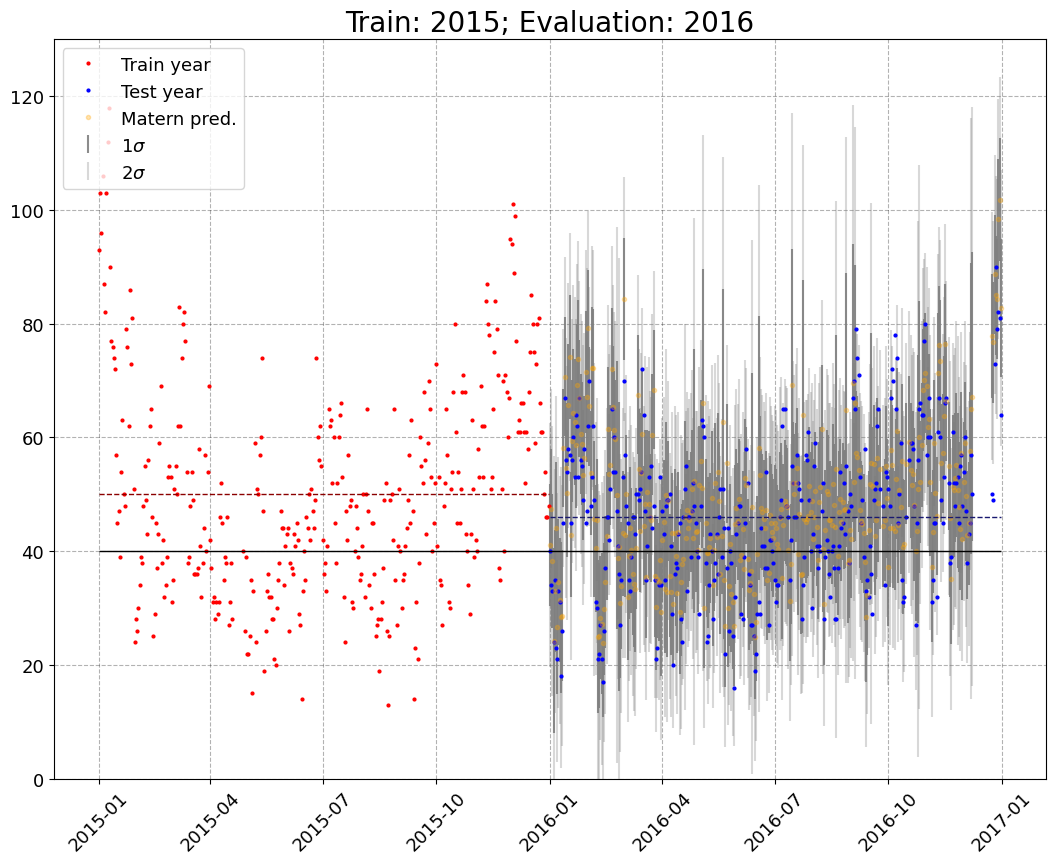

Tuned kernel Matern:  44**2 * Matern(length_scale=18.2, nu=1.5) + WhiteKernel(noise_level=74.6)
Tuned kernel RQ:  57.1**2 * RationalQuadratic(alpha=0.0134, length_scale=10.9) + WhiteKernel(noise_level=60.4)
Log-Likelihood of 2017 pollutant concentration (Matern): -1428.50572170195
Log-Likelihood of 2017 pollutant concentration (RQ): -1431.7691266417755
RMSE of 2017 with Matern: 11.761546418160105
RMSE of 2017 with RQ: 11.979904302803257
RMSE of the linear model: 11.950094232692761
RMSE of the Elastic-Net: 11.99857858243667

Penalization term of E-Net: 0.07524727340418834 and mixture term 0.25

Times for:
 GP_Matern:    6.429954528808594 s
 GP_RQ:    6.8055336475372314 s
 OLS:   0.0015685558319091797 s
 E-net: 0.2853381633758545 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


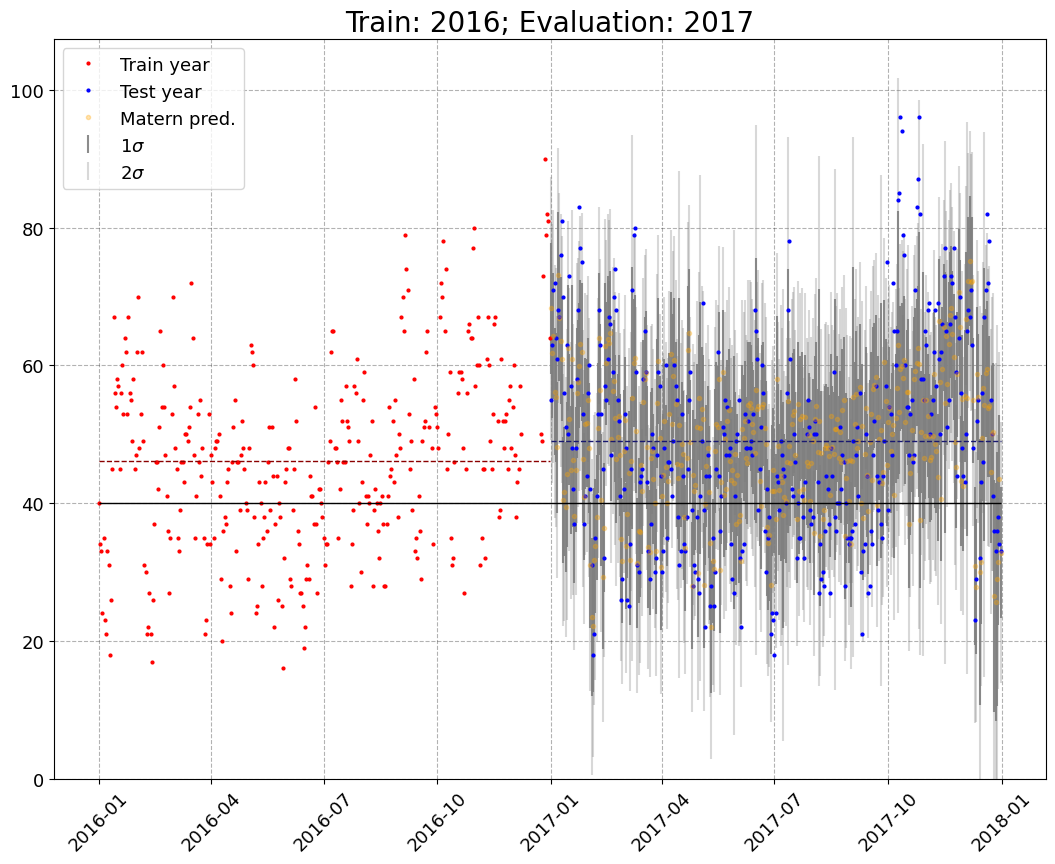

Tuned kernel Matern:  35.4**2 * Matern(length_scale=12.4, nu=1.5) + WhiteKernel(noise_level=110)
Tuned kernel RQ:  55.3**2 * RationalQuadratic(alpha=0.0176, length_scale=10.3) + WhiteKernel(noise_level=98)
Log-Likelihood of 2018 pollutant concentration (Matern): -1332.8581409354485
Log-Likelihood of 2018 pollutant concentration (RQ): -1332.5069030989146
RMSE of 2018 with Matern: 11.005916723195908
RMSE of 2018 with RQ: 10.935123725369616
RMSE of the linear model: 11.554103310840677
RMSE of the Elastic-Net: 11.326753664735273

Penalization term of E-Net: 0.38025728359357946 and mixture term 0.25

Times for:
 GP_Matern:    7.072666883468628 s
 GP_RQ:    6.570812463760376 s
 OLS:   0.0010135173797607422 s
 E-net: 0.2940552234649658 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


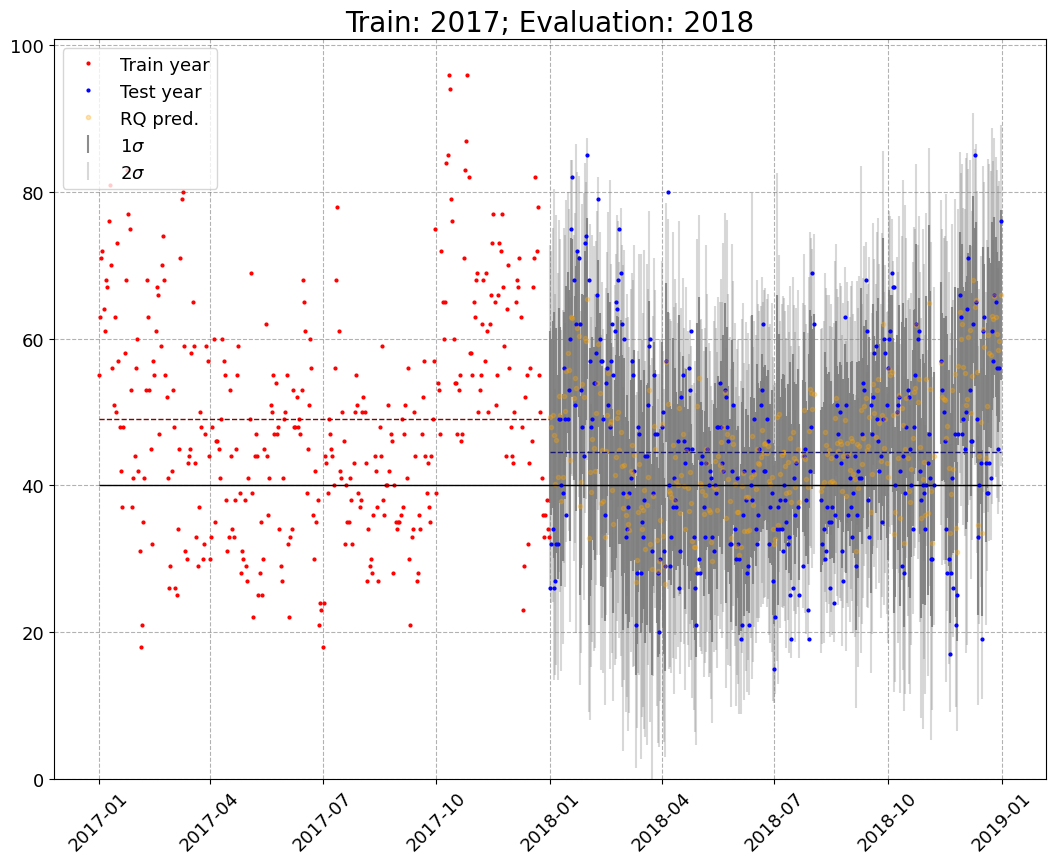

Tuned kernel Matern:  47.1**2 * Matern(length_scale=22.1, nu=1.5) + WhiteKernel(noise_level=93.7)
Tuned kernel RQ:  52.8**2 * RationalQuadratic(alpha=0.0202, length_scale=12.1) + WhiteKernel(noise_level=83.2)
Log-Likelihood of 2019 pollutant concentration (Matern): -1451.773736697052
Log-Likelihood of 2019 pollutant concentration (RQ): -1445.961618687612
RMSE of 2019 with Matern: 16.024804692410612
RMSE of 2019 with RQ: 15.87169341845976
RMSE of the linear model: 16.578566541978887
RMSE of the Elastic-Net: 16.876385050398557

Penalization term of E-Net: 0.06663338772199136 and mixture term 0.25

Times for:
 GP_Matern:    6.427792549133301 s
 GP_RQ:    5.329488754272461 s
 OLS:   0.002785205841064453 s
 E-net: 0.2710444927215576 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


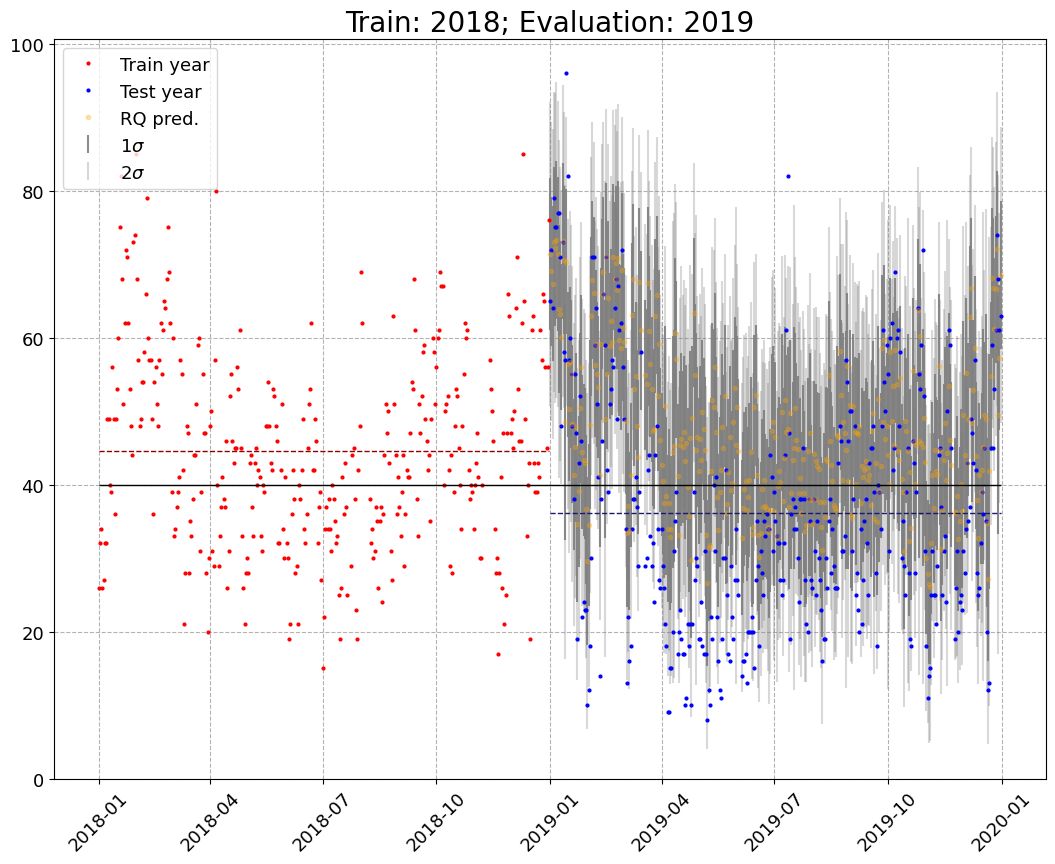

Tuned kernel Matern:  42.8**2 * Matern(length_scale=16.3, nu=1.5) + WhiteKernel(noise_level=96.9)
Tuned kernel RQ:  54.1**2 * RationalQuadratic(alpha=0.0708, length_scale=14.2) + WhiteKernel(noise_level=97.6)
Log-Likelihood of 2020 pollutant concentration (Matern): -1451.9205321611132
Log-Likelihood of 2020 pollutant concentration (RQ): -1451.1692874960017
RMSE of 2020 with Matern: 14.407046724526468
RMSE of 2020 with RQ: 14.604020515983096
RMSE of the linear model: 15.213083590440531
RMSE of the Elastic-Net: 15.259476664347483

Penalization term of E-Net: 0.5498507638930745 and mixture term 0.75

Times for:
 GP_Matern:    6.216621160507202 s
 GP_RQ:    7.2413787841796875 s
 OLS:   0.0010585784912109375 s
 E-net: 0.2678501605987549 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


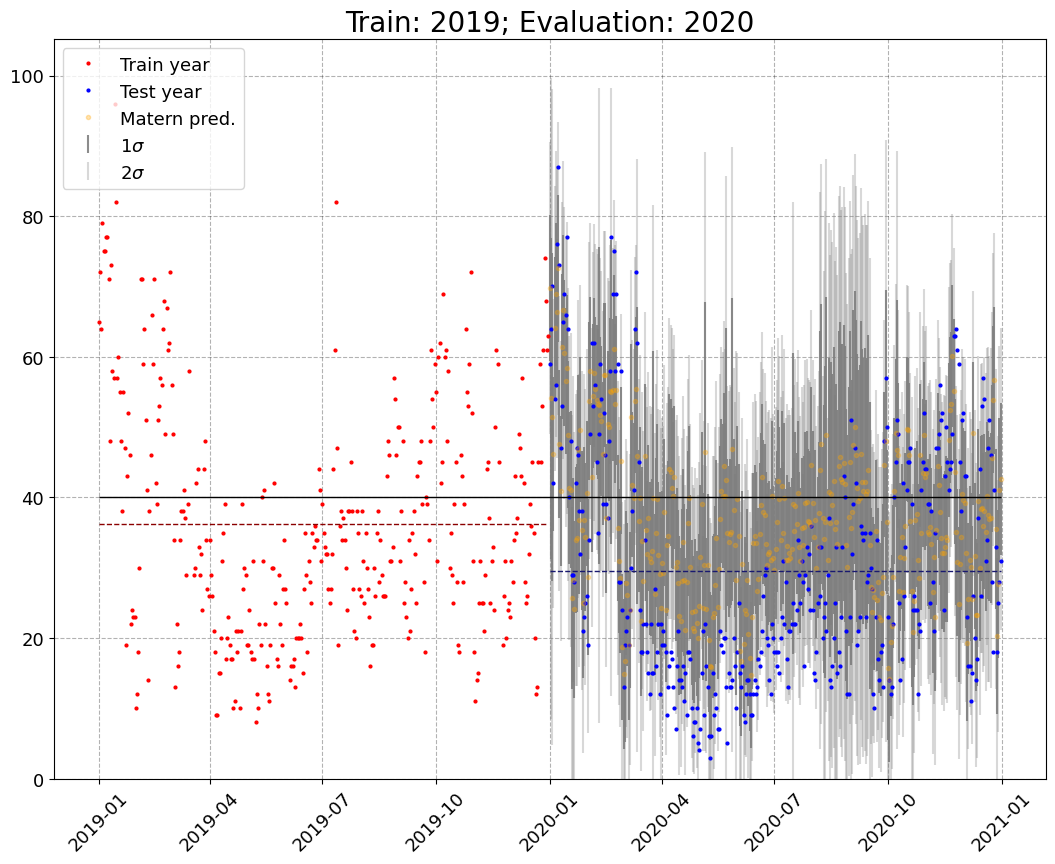

Tuned kernel Matern:  28.8**2 * Matern(length_scale=8.81, nu=1.5) + WhiteKernel(noise_level=97.7)
Tuned kernel RQ:  39.1**2 * RationalQuadratic(alpha=0.0685, length_scale=7.68) + WhiteKernel(noise_level=94.8)
Log-Likelihood of 2021 pollutant concentration (Matern): -1406.1340017863772
Log-Likelihood of 2021 pollutant concentration (RQ): -1405.5297892882538
RMSE of 2021 with Matern: 15.724974457430697
RMSE of 2021 with RQ: 13.587815641746323
RMSE of the linear model: 15.26820263621819
RMSE of the Elastic-Net: 15.354815073658958

Penalization term of E-Net: 0.03278878038797316 and mixture term 1.0

Times for:
 GP_Matern:    6.854866027832031 s
 GP_RQ:    7.532696485519409 s
 OLS:   0.0 s
 E-net: 0.2605276107788086 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


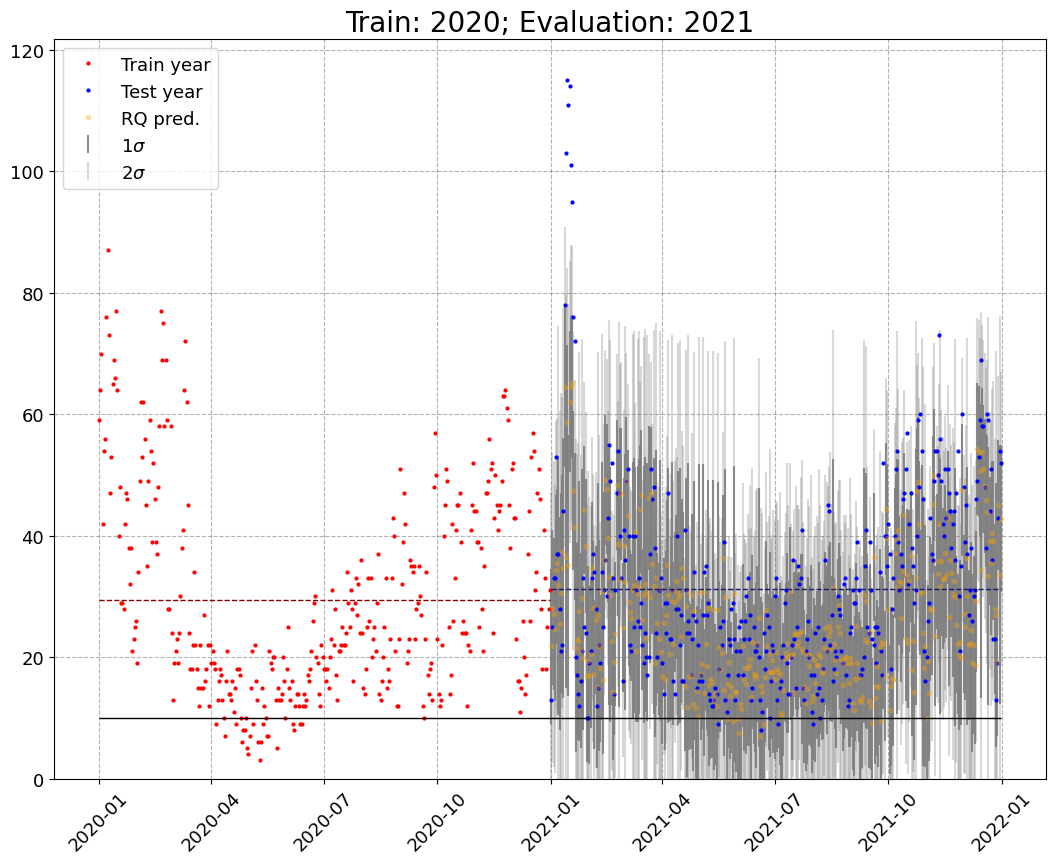

Tuned kernel Matern:  34**2 * Matern(length_scale=9.07, nu=1.5) + WhiteKernel(noise_level=73.5)
Tuned kernel RQ:  47.4**2 * RationalQuadratic(alpha=0.0279, length_scale=4.88) + WhiteKernel(noise_level=39.2)
Log-Likelihood of 2022 pollutant concentration (Matern): -1353.411818465085
Log-Likelihood of 2022 pollutant concentration (RQ): -1356.7793298366566
RMSE of 2022 with Matern: 11.366745835454791
RMSE of 2022 with RQ: 10.834383731072393
RMSE of the linear model: 11.112007421444522
RMSE of the Elastic-Net: 11.55629820959636

Penalization term of E-Net: 0.2885697816935355 and mixture term 0.25

Times for:
 GP_Matern:    6.532310247421265 s
 GP_RQ:    5.851081848144531 s
 OLS:   0.0023622512817382812 s
 E-net: 0.29564642906188965 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


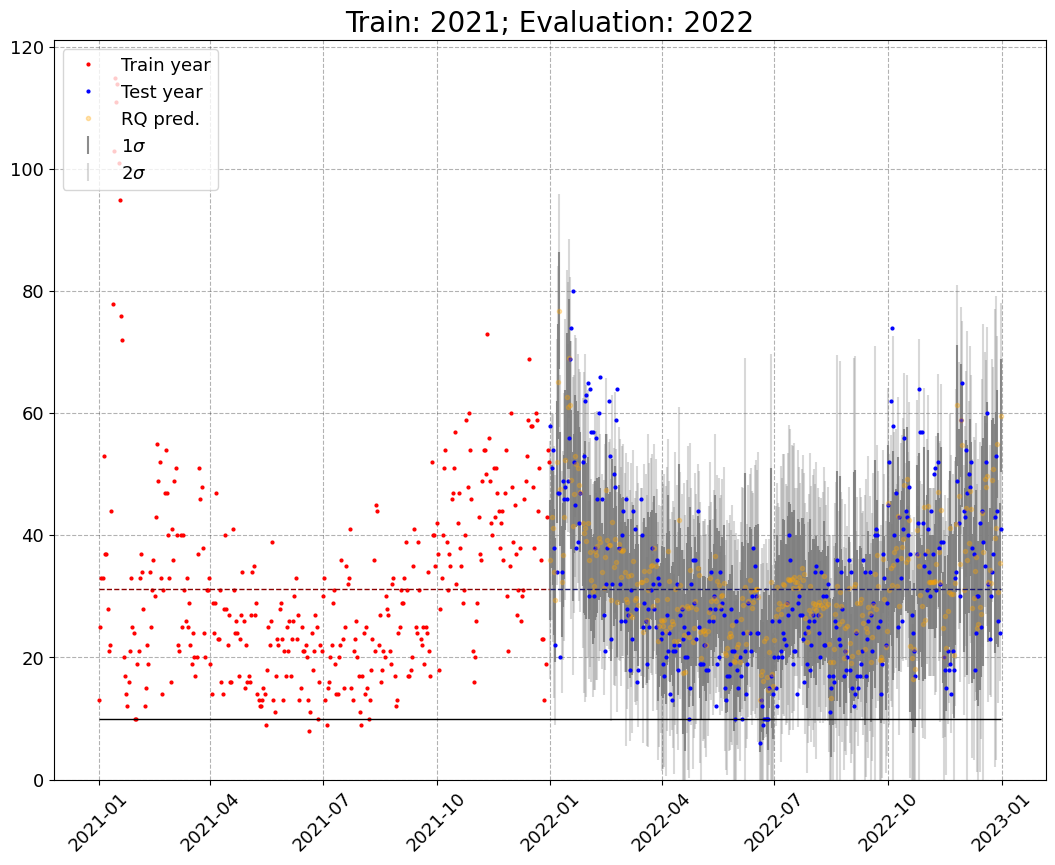

Tuned kernel Matern:  26**2 * Matern(length_scale=10.2, nu=1.5) + WhiteKernel(noise_level=78.4)
Tuned kernel RQ:  40.9**2 * RationalQuadratic(alpha=0.0209, length_scale=7.76) + WhiteKernel(noise_level=67.4)
Log-Likelihood of 2023 pollutant concentration (Matern): -1023.5363657051674
Log-Likelihood of 2023 pollutant concentration (RQ): -1020.4198258194901
RMSE of 2023 with Matern: 10.343126330184374
RMSE of 2023 with RQ: 9.465331685357993
RMSE of the linear model: 9.557915695917616
RMSE of the Elastic-Net: 9.502329707818172

Penalization term of E-Net: 0.05042379328143253 and mixture term 0.25

Times for:
 GP_Matern:    9.074713230133057 s
 GP_RQ:    12.365844011306763 s
 OLS:   0.0009999275207519531 s
 E-net: 0.27207016944885254 s


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


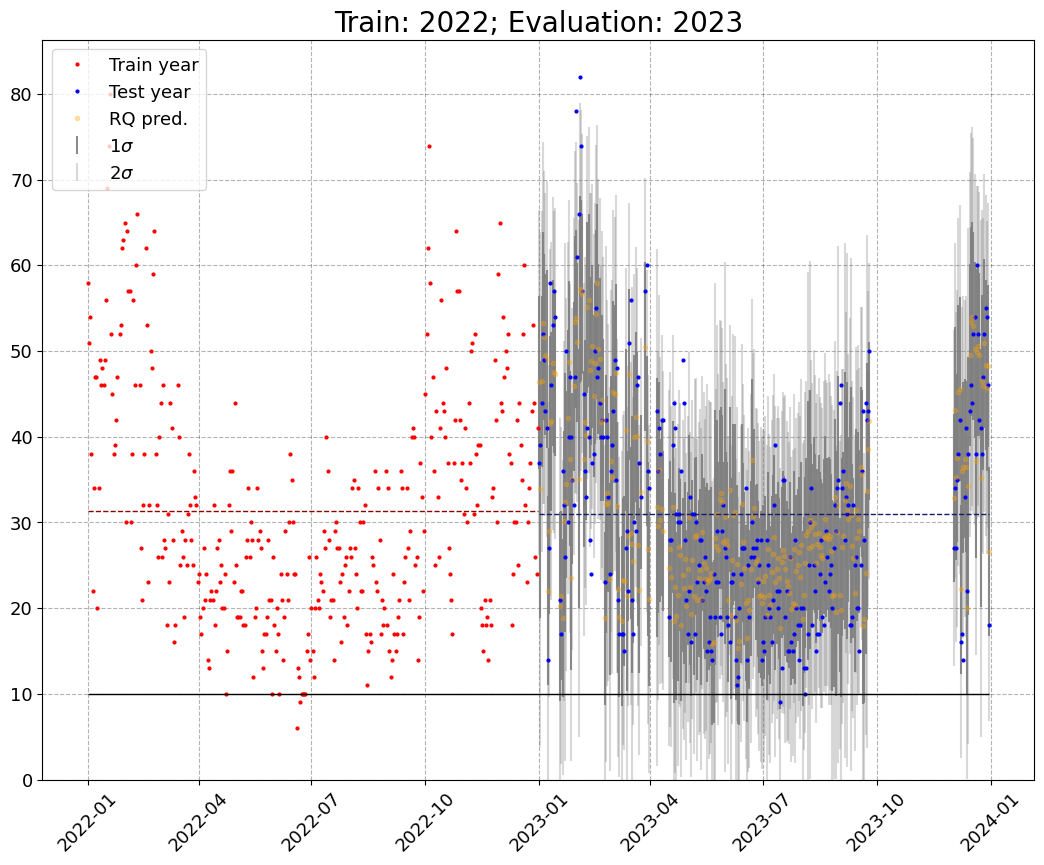

In [32]:
# JUST EVALUATION AND PLOTS (not training neither preprocessing)

# plt.rcParams['figure.figsize']= default_size_for_plot #default parameters [6.4,4.8]

# for bigger plots:
scale = np.array([1,1])*2
plt.rcParams['figure.figsize']= scale*default_size_for_plot

# range of years used for training
initial_year = 2015
last_year = 2022

yearly_mean_NO2 ={}


for year in range(initial_year, last_year + 1):
    
    train_year = year
    evaluation_year = train_year + 1


    # split train and test
    train = df.loc[df['fecha'].dt.year==train_year, model_variables]
    test = df.loc[df['fecha'].dt.year==evaluation_year, model_variables]
    
    y_train = train['D']
    y_test = test['D']
    
    yearly_mean_NO2[evaluation_year] = np.mean(y_test.values)
    

    ###################################### MODEL ###############################################
    

    gp_pre = all_GP_models['Matern'][train_year]
    gp_post = all_GP_models['RQ'][train_year]

    # check tuning of the kernel:
    print('Tuned kernel Matern: ',gp_pre.kernel_)
    print('Tuned kernel RQ: ',gp_post.kernel_)

    # MODEL PERFORMANCE:
    pre_log_l = all_metrics[evaluation_year]['M_log-l']
    post_log_l = all_metrics[evaluation_year]['RQ_log-l']
    rmse_gp_1 = all_metrics[evaluation_year]['RMSE_M']
    rmse_gp_2 = all_metrics[evaluation_year]['RMSE_RQ']
    rmse_ols = all_metrics[evaluation_year]['RMSE-enet']
    rmse_enet = all_metrics[evaluation_year]['RMSE-OLS']

    print(f'Log-Likelihood of {evaluation_year} pollutant concentration (Matern): {pre_log_l}')
    print(f'Log-Likelihood of {evaluation_year} pollutant concentration (RQ): {post_log_l}')
    
    print(f'RMSE of {evaluation_year} with Matern: {rmse_gp_1}')
    print(f'RMSE of {evaluation_year} with RQ: {rmse_gp_2}')
    
    print(f'RMSE of the linear model: {rmse_ols}')
    print(f'RMSE of the Elastic-Net: {rmse_enet}')

    enet_model = all_linear_models['enet'][train_year]
    print()
    print(f'Penalization term of E-Net: {enet_model.alpha_} and mixture term {enet_model.l1_ratio_}')

    # times:
    time_1 = all_times[evaluation_year]['Matern']
    time_2 = all_times[evaluation_year]['RQ']
    time_3 = all_times[evaluation_year]['OLS']
    time_4 = all_times[evaluation_year]['enet']

    print('\nTimes for:')
    print(f' GP_Matern:    {time_1} s')
    print(f' GP_RQ:    {time_2} s')
    print(f' OLS:   {time_3} s')
    print(f' E-net: {time_4} s')

    ### hypothesis testing ##
    # not meaningful, for the moment
    #########################


    ################## plot ######################
    best= ''
    if rmse_gp_1 < rmse_gp_2:
        best='Matern'
    elif rmse_gp_1 == rmse_gp_2:
        best=''
        print('NUMERICAL COINCIDENCE!!')
    else:
        best='RQ'
    
    best_gp = all_GP_models[best][train_year]
    pred = all_y_pred[best][evaluation_year]
    cov = all_cov_pred[best][evaluation_year]

    if evaluation_year < 2021:
        WHO = 40
    else:
        WHO = 10

    sigmas = np.sqrt(np.diag(cov))

    label_train = df.loc[df['fecha'].dt.year==train_year, 'fecha']
    label_test = df.loc[df['fecha'].dt.year==evaluation_year, 'fecha']
    ###intervals###
    plt.errorbar(label_test, pred, yerr=sigmas, ecolor = 'grey',alpha=0.9, ls='', label = r'1$\sigma$')
    plt.errorbar(label_test, pred, yerr=2*sigmas, ecolor = 'grey',alpha=0.3, ls='', label = r'2$\sigma$')
    # plt.fill(np.concatenate([label_test.values,label_test.values[::-1]]), 
    #          np.concatenate([pred + 1*sigmas,pred[::-1] - 1*sigmas]), 'grey', alpha=0.6, label=r'1$\sigma$')
    # plt.fill(np.concatenate([label_test.values,label_test.values[::-1]]), 
    #          np.concatenate([pred + 2*sigmas,pred[::-1] - 2*sigmas]), 'grey', alpha=0.3, label=r'2$\sigma$')
    ###############
    
    # Plot: model, observations and new data
    plt.plot(label_train, y_train, color='red', marker='o', markersize=2, ls='', label='Train year')
    plt.plot(label_test, y_test, color='blue', marker='o', markersize=2, ls='', label='Test year')
    plt.plot(label_test, pred, color= 'orange', marker='o' , linestyle = '' ,
            markersize = 3, linewidth= 1, alpha = 0.3, label= best+' pred.')
    # plt.plot(label_test, pred, color= 'black', marker='' , linestyle = '-' ,
    #          markersize = 3, linewidth= 0.6, alpha = 1, label='Prediction')
    
    plt.ylim(bottom=0) 
    plt.title(f'Train: {train_year}; Evaluation: {evaluation_year}',fontsize=20)
    plt.xticks(rotation=45,fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(linestyle='dashed', color='black', alpha=0.3)
    
    plt.hlines(y=[WHO, y_train.mean(), y_test.mean()], colors=['black', 'darkred','midnightblue'], ls=['-','--','--'],lw=1,
            xmin=[label_train.values[0],label_train.values[0],label_test.values[0]], 
            xmax=[label_test.values[-1],label_train.values[-1],label_test.values[-1]])
    plt.legend(loc='upper left',fontsize=13)
    plt.savefig(f'saved_images/figuras_png/grafica_{evaluation_year}.png', bbox_inches='tight')
    plt.savefig(f'saved_images/figuras_jpg/grafica_{evaluation_year}.jpg', bbox_inches='tight')
    plt.savefig(f'saved_images/figuras_eps/grafica_{evaluation_year}.eps', format='eps', bbox_inches='tight') #i read this is better for latex
    plt.savefig(f'saved_images/figuras_svg/grafica_{evaluation_year}.svg', format='svg', bbox_inches='tight')
    plt.show()
    ################

In [33]:
# mean_no2= {i:df.loc[df['fecha'].dt.year==i,'D'].mean() for i in range(2010,2023+1)}
# mean_no2
# starting_year = 2015 #2010
# MC_year = 2018 #2019
# pre_MC = np.mean([mean_no2[i] for i in mean_no2.keys() if i>=starting_year and i<MC_year])
# pre_COVID = np.mean([mean_no2[i] for i in mean_no2.keys() if i>=starting_year and i<2020])
# print(pre_MC,pre_COVID)

In [34]:
# # hypothesis test
# n = len(y_pred)
# c = (1/n)*np.ones(n)
# normal_mean = np.dot(c, y_pred)
# normal_sd = np.dot(c, np.dot(pred_cov,c))**0.5
# p_values = norm.cdf(df.loc[df['fecha'].dt.year==train_year,'D'].mean(),loc=normal_mean,scale=normal_sd)
# # the test results in no useful information, since p-values are always very big

In [35]:
# # just a check
# a=np.ones(3)
# b=np.ones(3)
# b[1]=0
# M=np.array([[2,0,0],
#             [2,0,0],
#             [0,3,0]])
# # (1,1,1)*[[2,0,0],*(1,)=(1,1,1)*(2)=2+2+0=4
# #          [2,4,0], (0,)         (2)
# #          [0,3,0]] (1)          (0)
# np.dot(a,np.dot(M,b))

In [36]:
for k in all_GP_models.keys():
    for i,j in zip(all_GP_models[k].values(),all_GP_models[k].keys()):
        print(j,' :', i.kernel_)
    print('')
print('')
for i,j in zip(all_metrics.values(),all_metrics.keys()):
    print(j,' :',i)

2015  : 62.3**2 * Matern(length_scale=19.4, nu=1.5) + WhiteKernel(noise_level=100)
2016  : 44**2 * Matern(length_scale=18.2, nu=1.5) + WhiteKernel(noise_level=74.6)
2017  : 35.4**2 * Matern(length_scale=12.4, nu=1.5) + WhiteKernel(noise_level=110)
2018  : 47.1**2 * Matern(length_scale=22.1, nu=1.5) + WhiteKernel(noise_level=93.7)
2019  : 42.8**2 * Matern(length_scale=16.3, nu=1.5) + WhiteKernel(noise_level=96.9)
2020  : 28.8**2 * Matern(length_scale=8.81, nu=1.5) + WhiteKernel(noise_level=97.7)
2021  : 34**2 * Matern(length_scale=9.07, nu=1.5) + WhiteKernel(noise_level=73.5)
2022  : 26**2 * Matern(length_scale=10.2, nu=1.5) + WhiteKernel(noise_level=78.4)

2015  : 76.9**2 * RationalQuadratic(alpha=0.0646, length_scale=17.2) + WhiteKernel(noise_level=102)
2016  : 57.1**2 * RationalQuadratic(alpha=0.0134, length_scale=10.9) + WhiteKernel(noise_level=60.4)
2017  : 55.3**2 * RationalQuadratic(alpha=0.0176, length_scale=10.3) + WhiteKernel(noise_level=98)
2018  : 52.8**2 * RationalQuadratic

In [37]:
# based on only training
print('Who is the best model regarding the training log marginal likelihood?:\n')
for year in range(initial_year, last_year+1):
    best = 'nadie'
    criterium = -np.inf
    print(year)
    for dic_lab in all_GP_models.keys():
        current_model = all_GP_models[dic_lab][year].log_marginal_likelihood()
        if criterium < current_model:
            best = dic_lab
            criterium = current_model
        print(dic_lab+':',current_model)
    print('Best: '+best)
    print()

Who is the best model regarding the training log marginal likelihood?:

2015
Matern: -1377.5186821182922
RQ: -1376.3362779925883
Best: RQ

2016
Matern: -1278.3850003152834
RQ: -1276.1038646703773
Best: RQ

2017
Matern: -1421.585541889944
RQ: -1417.1646426645043
Best: RQ

2018
Matern: -1334.9072335962956
RQ: -1334.7674252587876
Best: RQ

2019
Matern: -1368.1858812453534
RQ: -1367.3948198230669
Best: RQ

2020
Matern: -1414.9372109191481
RQ: -1412.7236854204234
Best: RQ

2021
Matern: -1380.6787742197514
RQ: -1376.8605620305618
Best: RQ

2022
Matern: -1350.5017928595423
RQ: -1345.717069053987
Best: RQ



In [38]:
all_metrics[2016]

{'RMSE_M': np.float64(10.55491735590675),
 'M_log-l': np.float64(-1286.2748729191253),
 'RMSE_RQ': np.float64(10.843958610247874),
 'RQ_log-l': np.float64(-1287.883974141751),
 'RMSE-OLS': np.float64(11.24376800782731),
 'RMSE-enet': np.float64(10.67110534268046)}

In [39]:
last_year

2022

In [40]:
# reordering my dictionary, since is not that comfortable
metrics_name = [i for i in all_metrics[last_year]]
years_for_performance = all_metrics.keys()
metrics_dict = {i:{j:all_metrics[j][i] for j in years_for_performance} for i in metrics_name}
# metrics_dict

In [41]:
# some visualization
for i in metrics_dict.keys():
    plot_x = list(metrics_dict[i].keys())
    plot_y = list(metrics_dict[i].values())
    # plt.plot(plot_x,plot_y)
    # plt.title(i)
    # save some variables
    if i=='RMSE_M':
        rmse_vector_matern = plot_y
    elif i=='RMSE_RQ':
        rmse_vector_RQ = plot_y
    elif i=='M_log-l':
        marginal_matern = plot_y
    elif i=='RQ_log-l':
        marginal_RQ = plot_y
    elif i=='RMSE-OLS':
        rmse_vector_ols = plot_y
    elif i=='RMSE-enet':
        rmse_vector_enet = plot_y
    # plt.show()

In [42]:
all_metrics

{2016: {'RMSE_M': np.float64(10.55491735590675),
  'M_log-l': np.float64(-1286.2748729191253),
  'RMSE_RQ': np.float64(10.843958610247874),
  'RQ_log-l': np.float64(-1287.883974141751),
  'RMSE-OLS': np.float64(11.24376800782731),
  'RMSE-enet': np.float64(10.67110534268046)},
 2017: {'RMSE_M': np.float64(11.761546418160105),
  'M_log-l': np.float64(-1428.50572170195),
  'RMSE_RQ': np.float64(11.979904302803257),
  'RQ_log-l': np.float64(-1431.7691266417755),
  'RMSE-OLS': np.float64(11.99857858243667),
  'RMSE-enet': np.float64(11.950094232692761)},
 2018: {'RMSE_M': np.float64(11.005916723195908),
  'M_log-l': np.float64(-1332.8581409354485),
  'RMSE_RQ': np.float64(10.935123725369616),
  'RQ_log-l': np.float64(-1332.5069030989146),
  'RMSE-OLS': np.float64(11.326753664735273),
  'RMSE-enet': np.float64(11.554103310840677)},
 2019: {'RMSE_M': np.float64(16.024804692410612),
  'M_log-l': np.float64(-1451.773736697052),
  'RMSE_RQ': np.float64(15.87169341845976),
  'RQ_log-l': np.float

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


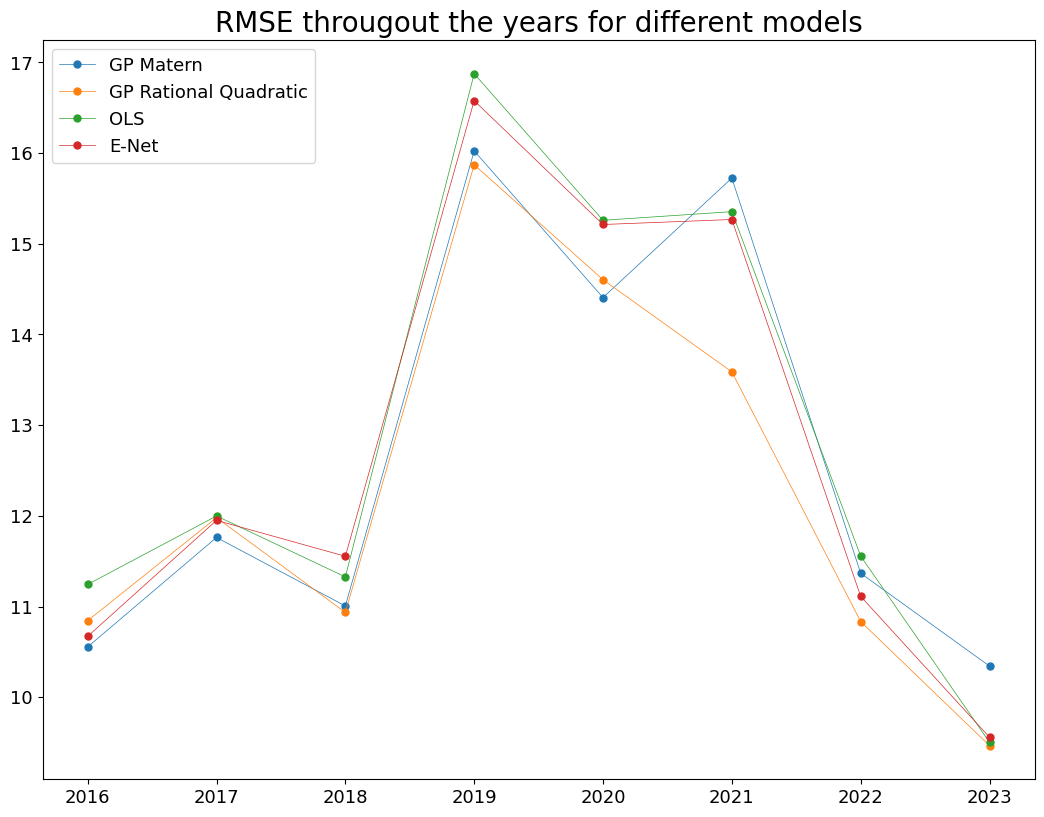

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


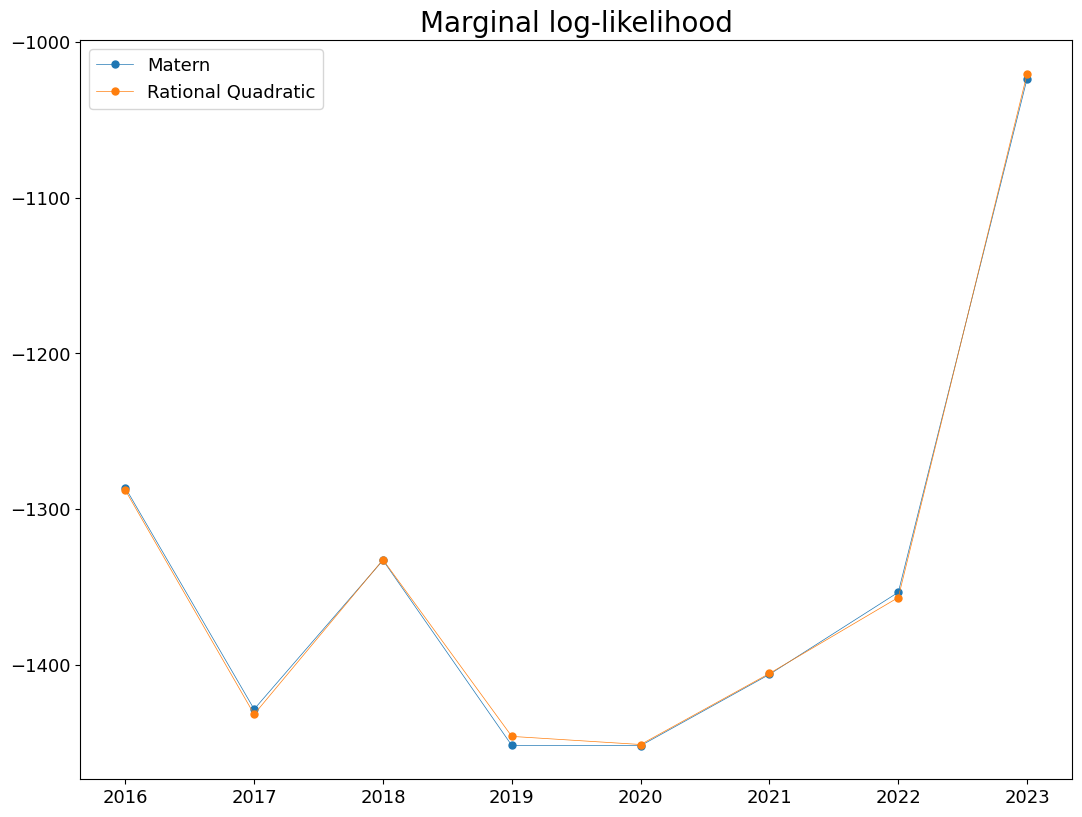

In [43]:
ploting_metrics = [rmse_vector_matern, rmse_vector_RQ, rmse_vector_ols, rmse_vector_enet, marginal_matern, marginal_RQ ]
naming_models = ['GP Matern', 'GP Rational Quadratic', 'OLS', 'E-Net','Matern','Rational Quadratic']
for i in range(len(ploting_metrics)):
    if naming_models[i]=='Matern':
        plt.title('RMSE througout the years for different models',fontsize=20)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.legend(loc='upper left',fontsize=13)
        plt.savefig(f'saved_images/figuras_png/RMSE_fig.png', bbox_inches='tight')
        plt.savefig(f'saved_images/figuras_jpg/RMSE_fig.jpg', bbox_inches='tight')
        plt.savefig(f'saved_images/figuras_eps/RMSE_fig.eps', format='eps', bbox_inches='tight') #i read this is better for latex, more or less
        plt.savefig(f'saved_images/figuras_svg/RMSE_fig.svg', format='svg', bbox_inches='tight')
        plt.show()
        
    plt.plot(plot_x,ploting_metrics[i],label=naming_models[i],
             marker='o',lw=0.5,ms=5)
    

plt.title('Marginal log-likelihood',fontsize=20)    
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left',fontsize=13)        
plt.savefig(f'saved_images/figuras_png/marginal_likelihod_fig.png', bbox_inches='tight')
plt.savefig(f'saved_images/figuras_jpg/marginal_likelihod_fig.jpg', bbox_inches='tight')
plt.savefig(f'saved_images/figuras_eps/marginal_likelihod_fig.eps', format='eps', bbox_inches='tight') #i read this is better for latex, more or less
plt.savefig(f'saved_images/figuras_svg/marginal_likelihod_fig.svg', format='svg', bbox_inches='tight')
plt.show()    

In [44]:
all_metrics

{2016: {'RMSE_M': np.float64(10.55491735590675),
  'M_log-l': np.float64(-1286.2748729191253),
  'RMSE_RQ': np.float64(10.843958610247874),
  'RQ_log-l': np.float64(-1287.883974141751),
  'RMSE-OLS': np.float64(11.24376800782731),
  'RMSE-enet': np.float64(10.67110534268046)},
 2017: {'RMSE_M': np.float64(11.761546418160105),
  'M_log-l': np.float64(-1428.50572170195),
  'RMSE_RQ': np.float64(11.979904302803257),
  'RQ_log-l': np.float64(-1431.7691266417755),
  'RMSE-OLS': np.float64(11.99857858243667),
  'RMSE-enet': np.float64(11.950094232692761)},
 2018: {'RMSE_M': np.float64(11.005916723195908),
  'M_log-l': np.float64(-1332.8581409354485),
  'RMSE_RQ': np.float64(10.935123725369616),
  'RQ_log-l': np.float64(-1332.5069030989146),
  'RMSE-OLS': np.float64(11.326753664735273),
  'RMSE-enet': np.float64(11.554103310840677)},
 2019: {'RMSE_M': np.float64(16.024804692410612),
  'M_log-l': np.float64(-1451.773736697052),
  'RMSE_RQ': np.float64(15.87169341845976),
  'RQ_log-l': np.float

In [45]:
# best model based on likelihood as a performance metric of GP:
print('Who is the model that (given the assumptions) \nis more likely to "come from the data"?:\n')
for year in all_metrics.keys():
    best = 'nadie'
    criterium = -np.inf
    print(year)
    for models in ['M_log-l','RQ_log-l']:
        current_likelihood = all_metrics[year][models]
        if criterium < current_likelihood:
            best = models
            criterium = current_likelihood
        print(models.replace('_log-l','').replace('M','Matern')+': ',current_likelihood)
    print('Best: '+best)
    print()

Who is the model that (given the assumptions) 
is more likely to "come from the data"?:

2016
Matern:  -1286.2748729191253
RQ:  -1287.883974141751
Best: M_log-l

2017
Matern:  -1428.50572170195
RQ:  -1431.7691266417755
Best: M_log-l

2018
Matern:  -1332.8581409354485
RQ:  -1332.5069030989146
Best: RQ_log-l

2019
Matern:  -1451.773736697052
RQ:  -1445.961618687612
Best: RQ_log-l

2020
Matern:  -1451.9205321611132
RQ:  -1451.1692874960017
Best: RQ_log-l

2021
Matern:  -1406.1340017863772
RQ:  -1405.5297892882538
Best: RQ_log-l

2022
Matern:  -1353.411818465085
RQ:  -1356.7793298366566
Best: M_log-l

2023
Matern:  -1023.5363657051674
RQ:  -1020.4198258194901
Best: RQ_log-l



# TABLAS:

In [46]:
all_metrics
table_metric_values=[[year]+ list(all_metrics[year].values()) for year in all_metrics.keys()]
table_metric =[['Ev. year']+ [each_metric for each_metric in all_metrics[last_year].keys()]]

# display(table_metric_values)
table_metric += table_metric_values
table_metric=np.array(table_metric,dtype='object')
display(table_metric)

array([['Ev. year', 'RMSE_M', 'M_log-l', 'RMSE_RQ', 'RQ_log-l',
        'RMSE-OLS', 'RMSE-enet'],
       [2016, np.float64(10.55491735590675),
        np.float64(-1286.2748729191253), np.float64(10.843958610247874),
        np.float64(-1287.883974141751), np.float64(11.24376800782731),
        np.float64(10.67110534268046)],
       [2017, np.float64(11.761546418160105),
        np.float64(-1428.50572170195), np.float64(11.979904302803257),
        np.float64(-1431.7691266417755), np.float64(11.99857858243667),
        np.float64(11.950094232692761)],
       [2018, np.float64(11.005916723195908),
        np.float64(-1332.8581409354485), np.float64(10.935123725369616),
        np.float64(-1332.5069030989146), np.float64(11.326753664735273),
        np.float64(11.554103310840677)],
       [2019, np.float64(16.024804692410612),
        np.float64(-1451.773736697052), np.float64(15.87169341845976),
        np.float64(-1445.961618687612), np.float64(16.876385050398557),
        np.float64(16

In [47]:
# workbook = xlsxwriter.Workbook('tables/tables_raw_from_python.xlsx')
# ws = workbook.add_worksheet()
# for i in range(np.shape(table_metric)[0]):
#     ws.write_row(row=i,col=0,data=table_metric[i,:])
# workbook.close()

In [48]:
# # KERNEL SEARCH:

# initial_year = 2015
# last_year = 2022

# for year in range(initial_year, last_year + 1):
#     # beware of number of  hyperparameters:
#     Kernel_MC = 1.0**2 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1**2) # 1+1+1=3 (lenght scale)
#     matern_3_2 = 1.0**2 * Matern(nu=3/2) + WhiteKernel(noise_level=1**2) # 1+1+1=3 (lenght scale)
#     matern_5_2 = 1.0**2 * Matern(nu=5/2) + WhiteKernel(noise_level=1**2) # 1+1+1=3 (lenght scale)
#     ratio_quad = 1.0**2* RationalQuadratic() + WhiteKernel(noise_level=1**2) # 1+2+1=4 (lenght scale and alpha)
#     periodic = 1.0**2 * ExpSineSquared() + WhiteKernel(noise_level=1**2) # 1+2+1=4 (lenght scale and alpha)
#     rbf_periodicity = 1.0**2 * RBF(length_scale=1.0) + 1.0**2 * ExpSineSquared() + WhiteKernel(noise_level=1**2) # 2+3+1=6 (lenght scale and alpha)

#     GP = GaussianProcessRegressor(kernel=Kernel_MC, n_restarts_optimizer=10, random_state=0)
#     GP_m3 = GaussianProcessRegressor(kernel=matern_3_2, n_restarts_optimizer=10, random_state=0)
#     GP_m5 = GaussianProcessRegressor(kernel=matern_5_2, n_restarts_optimizer=10, random_state=0)
#     GP_rq = GaussianProcessRegressor(kernel=ratio_quad, n_restarts_optimizer=10, random_state=0)
#     GP_sin = GaussianProcessRegressor(kernel=periodic, n_restarts_optimizer=10, random_state=0)
#     GP_rbf_sin = GaussianProcessRegressor(kernel=rbf_periodicity, n_restarts_optimizer=10, random_state=0)



#     # imputation:
#     # since we expect a high computational demand we impute with KNN with just k=5 (scikit learn default value)
#     # IF the computational cost does not increase very much, we could include a CV for selecting the number of neigbohrs

#     knn_imputer = KNNImputer(n_neighbors=10)
#     scaler = StandardScaler()

#     train_year = year
#     evaluation_year = train_year + 1


#     # split train and test
#     train = df.loc[df['fecha'].dt.year==train_year, model_variables]
#     test = df.loc[df['fecha'].dt.year==evaluation_year, model_variables]
#     # separate predictors and response
#     X_train = train.drop('D', axis = 1)
#     X_test = test.drop('D', axis=1)
#     y_train = train['D']
#     y_test = test['D']


#     ###################################### MODEL ###############################################
#     #impute (we impute 'dir' by hand: 88 missing value, 99 variable direction)
#     X_train.loc[X_train['dir']==88,'dir'] = np.nan
    
#     na_mean = X_train.loc[X_train['dir']!=99, 'dir'].mean()
#     X_train.loc[X_train['dir']==99,'dir'] = na_mean
#     # X_train.loc[X_train['dir']==99,'dir'] = np.nan # this would be the usual choice of imputing all the same
    
#     # knn for missing values:
#     X_train = knn_imputer.fit_transform(X_train)
#     X_test = knn_imputer.transform(X_test)

#     #preprocessing (scale):
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     # convert to DataFrames:
#     X_train = pd.DataFrame(X_train, columns = predictors)
#     X_test = pd.DataFrame(X_test, columns = predictors)

#     # train
#     start_gp = time.time()
#     GP.fit(X=X_train,y=y_train)
#     gp_time = time.time() - start_gp

    
#     start_m3 = time.time()
#     GP_m3.fit(X=X_train,y=y_train)
#     m3_time = time.time() - start_m3

    
#     start_m5 = time.time()
#     GP_m5.fit(X=X_train,y=y_train)
#     m5_time = time.time() - start_m5

    
#     start_rq = time.time()
#     GP_rq.fit(X=X_train,y=y_train)
#     rq_time = time.time() - start_rq


#     start_sin = time.time()
#     GP_sin.fit(X=X_train,y=y_train)
#     sin_time = time.time() - start_sin


#     # start_rbf_sin = time.time()
#     # GP_rbf_sin.fit(X=X_train,y=y_train)
#     # rbf_sin_time = time.time() - start_rbf_sin


#     print('Initial model:',GP)
#     # check tuning of the kernel:
#     print('Tuned kernel: ',GP.kernel_)
#     ############################################################################################

#     # MODEL PERFORMANCE:
    
#     y_pred, pred_cov = GP.predict(X_test, return_cov=True)

#     predictive_log_likelihood = multivariate_normal.logpdf(x=y_test.values, mean=y_pred, cov=pred_cov) # joint probability density function of the observed data
#     RMSE = root_mean_squared_error(y_true=y_test, y_pred=y_pred)

#     print(f'Log-Likelihood of {evaluation_year} pollutant concentration: {predictive_log_likelihood}')
#     print(f'RMSE of {evaluation_year} pollutant concentration: {RMSE}')


#     y_pred_m3, pred_cov_m3 = GP_m3.predict(X_test, return_cov=True)

#     predictive_log_likelihood_m3 = multivariate_normal.logpdf(x=y_test.values, mean=y_pred_m3, cov=pred_cov_m3) # joint probability density function of the observed data
#     RMSE_m3 = root_mean_squared_error(y_true=y_test, y_pred=y_pred_m3)

#     print(f'Log-Likelihood _m3 {evaluation_year} pollutant concentration: {predictive_log_likelihood_m3}')
#     print(f'RMSE _m3 {evaluation_year} pollutant concentration: {RMSE_m3}')


#     y_pred_m5, pred_cov_m5 = GP_m5.predict(X_test, return_cov=True)

#     predictive_log_likelihood_m5 = multivariate_normal.logpdf(x=y_test.values, mean=y_pred_m5, cov=pred_cov_m5) # joint probability density function of the observed data
#     RMSE_m5 = root_mean_squared_error(y_true=y_test, y_pred=y_pred_m5)

#     print(f'Log-Likelihood _m5 {evaluation_year} pollutant concentration: {predictive_log_likelihood_m5}')
#     print(f'RMSE _m5 {evaluation_year} pollutant concentration: {RMSE_m5}')


#     y_pred_rq, pred_cov_rq = GP_rq.predict(X_test, return_cov=True)

#     predictive_log_likelihood_rq = multivariate_normal.logpdf(x=y_test.values, mean=y_pred_rq, cov=pred_cov_rq) # joint probability density function of the observed data
#     RMSE_rq = root_mean_squared_error(y_true=y_test, y_pred=y_pred_rq)

#     print(f'Log-Likelihood _rq {evaluation_year} pollutant concentration: {predictive_log_likelihood_rq}')
#     print(f'RMSE _rq {evaluation_year} pollutant concentration: {RMSE_rq}')


#     y_pred_sin, pred_cov_sin = GP_sin.predict(X_test, return_cov=True)

#     predictive_log_likelihood_sin = multivariate_normal.logpdf(x=y_test.values, mean=y_pred_sin, cov=pred_cov_sin) # joint probability density function of the observed data
#     RMSE_sin = root_mean_squared_error(y_true=y_test, y_pred=y_pred_sin)

#     print(f'Log-Likelihood _sin {evaluation_year} pollutant concentration: {predictive_log_likelihood_sin}')
#     print(f'RMSE _sin {evaluation_year} pollutant concentration: {RMSE_sin}')


#     # y_pred_rbf_sin, pred_cov_rbf_sin = GP_rbf_sin.predict(X_test, return_cov=True)

#     # predictive_log_likelihood_rbf_sin = multivariate_normal.logpdf(x=y_test.values, mean=y_pred_rbf_sin, cov=pred_cov_rbf_sin) # joint probability density function of the observed data
#     # RMSE_rbf_sin = root_mean_squared_error(y_true=y_test, y_pred=y_pred_rbf_sin)

#     # print(f'Log-Likelihood _rbf_sin {evaluation_year} pollutant concentration: {predictive_log_likelihood_rbf_sin}')
#     # print(f'RMSE _rbf_sin {evaluation_year} pollutant concentration: {RMSE_rbf_sin}')



    
#     print('\nTimes for:')
#     print(f' GP:    {gp_time} s')
#     print(f' GP_m3:    {m3_time} s')
#     print(f' GP_m5:    {m5_time} s')
#     print(f' GP_rq:    {rq_time} s')
#     print(f' GP_sin:    {sin_time} s')
#     # print(f' GP_rbf_sin:    {rbf_sin_time} s')
